In [2]:
import torch
from torch import nn
from torch.nn import functional as F
# from attention import SelfAttention

class VAE_AttentionBlock(nn.Module):
    def __init__(self, channels: int):
        super().__init__()
        self.groupnorm = nn.GroupNorm(32, channels) 
        self.attention = SelfAttention(1, channels)
    
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        # x: (batch_size, features, height, width)
        residue = x 

class VAE_ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.groupnorm_1 = nn.GroupNorm(32, in_channels)
        self.conv_1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1)

        self.groupnorm_2 = nn.GroupNorm(32, in_channels)
        self.conv_2 = nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1)

        if in_channels == out_channels:
            self.residual_layer = nn.Identity()
        else:
            self.residual_layer = nn.Conv2d(in_channels, out_channels, kernel_size=1, padding=0)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        # x: (batch_size, in_channels, height, width)

        residue = x

        x = self.groupnorm_1(x)
        x = F.silu(x)
        x = self.conv_1(x)
        x = self.groupnorm_2(x)
        x = F.silu(x)
        x = self.conv_2(x)

        return x + self.residual_layer(residue)

In [17]:
y = torch.randn(1, 512, 64,64)
x = VAE_ResidualBlock(512,512)

In [ ]:
import torch
import torch.nn as nn

gn = nn.GroupNorm(32, 512)
x  = torch.randn(1, 512, 64, 64)

print(gn.num_channels)       # 512
print(gn.weight.shape)       # torch.Size([512])
print(gn.bias.shape)         # torch.Size([512])

y = gn(x)
print(y.shape)               # torch.Size([1, 512, 64, 64])


512
torch.Size([512])
torch.Size([512])


RuntimeError: Expected weight to be a vector of size equal to the number of channels in input, but got weight of shape [512] and input of shape [1, 256, 64, 64]

In [24]:
x.size(1)

AttributeError: 'VAE_ResidualBlock' object has no attribute 'size'

In [19]:
x.groupnorm_1(y)

tensor([[[[ 8.0189e-01,  5.6377e-01, -8.1966e-01,  ..., -2.1443e+00,
            2.8370e-01,  2.3234e+00],
          [ 3.9243e-01,  1.2829e+00,  2.5127e-03,  ...,  6.2754e-01,
           -5.5974e-01, -1.7650e+00],
          [ 3.1942e-01,  8.5115e-01, -1.1533e+00,  ..., -5.7782e-02,
            1.1361e-01, -3.9936e-01],
          ...,
          [-1.3893e-01,  9.4983e-01,  8.6832e-01,  ..., -1.8317e+00,
           -1.5502e+00, -5.7940e-01],
          [-6.5600e-01, -2.8222e-01,  3.9661e-01,  ...,  3.1617e-02,
           -9.8547e-02, -1.2549e+00],
          [-2.1635e+00, -9.5777e-01, -1.4139e+00,  ...,  7.4930e-01,
           -1.0994e+00, -1.7564e+00]],

         [[ 3.0560e+00,  2.4894e-01,  1.1582e+00,  ..., -3.7896e-01,
            2.1272e+00, -1.5740e+00],
          [-7.7373e-01,  1.9703e-01,  2.9609e-01,  ...,  7.4213e-01,
            1.4788e+00, -5.0561e-01],
          [-3.4743e-02, -4.1321e-01,  9.3160e-01,  ..., -1.1829e+00,
            5.0145e-01,  1.7025e+00],
          ...,
     

# normalization in vae

b up 
a down

# 🧠 Normalization in Neural Networks

## 1. Why Normalize?
Normalization keeps neural network features at a consistent scale and centered around zero during training.

**Goals:**
- Maintain **stable distributions** of features (reduce *internal covariate shift*).
- Prevent exploding/vanishing gradients.
- Speed up convergence.
- Add a small regularization effect.

**Main idea:** Rescale and re-center activations without changing the tensor shape.

---

## 2. Group Normalization (GroupNorm)

```python
import torch
from torch import nn

input = torch.randn(20, 6, 10, 10)  # (Batch=20, Channels=6, H=10, W=10)

# 6 channels split into 3 groups (2 channels per group)
m = nn.GroupNorm(3, 6)

# Each channel is its own group (InstanceNorm equivalent)
m = nn.GroupNorm(6, 6)

# All channels in one group (LayerNorm equivalent)
m = nn.GroupNorm(1, 6)

output = m(input)  # shape stays the same


In [1]:
import torch
from torch import nn
input = torch.randn(20, 6, 10, 10)
# Separate 6 channels into 3 groups
m = nn.GroupNorm(3, 6)
# Separate 6 channels into 6 groups (equivalent with InstanceNorm)
m = nn.GroupNorm(6, 6)
# Put all 6 channels into a single group (equivalent with LayerNorm)
m = nn.GroupNorm(1, 6)
# Activating the module
output = m(input)

In [4]:
input

tensor([[[[ 3.3719e-01,  1.1108e+00, -2.0069e+00,  ...,  2.8781e-01,
            1.3875e-01,  2.8103e-01],
          [-5.2101e-01, -5.5799e-01, -2.6062e-02,  ..., -7.3682e-01,
            1.2949e-01, -8.7267e-01],
          [ 1.4022e-01, -1.5072e+00, -2.0340e+00,  ..., -1.1148e+00,
           -2.0997e+00, -5.6002e-01],
          ...,
          [ 1.0805e+00, -1.2744e+00,  3.7956e-01,  ..., -5.0283e-01,
            4.2600e-01,  4.1920e-01],
          [ 3.7329e-01,  5.0775e-01, -3.3022e-02,  ...,  6.6907e-01,
            1.0909e+00, -1.2495e+00],
          [ 1.7766e+00,  2.5331e+00, -6.0233e-01,  ...,  5.6300e-02,
           -3.8031e-01,  1.6982e+00]],

         [[ 4.5350e-01, -1.7404e-01, -8.3019e-02,  ..., -6.3573e-01,
            2.0596e+00, -3.0518e-01],
          [-1.9255e+00,  2.3698e+00,  3.8025e-01,  ..., -2.0715e+00,
            1.4788e+00, -1.7120e+00],
          [-3.8703e-01, -1.7503e+00, -6.0649e-01,  ...,  1.0364e+00,
           -4.3047e-01, -7.0269e-02],
          ...,
     

In [5]:
output

tensor([[[[ 3.8634e-01,  1.1364e+00, -1.8862e+00,  ...,  3.3847e-01,
            1.9396e-01,  3.3190e-01],
          [-4.4569e-01, -4.8154e-01,  3.4169e-02,  ..., -6.5492e-01,
            1.8498e-01, -7.8663e-01],
          [ 1.9538e-01, -1.4018e+00, -1.9126e+00,  ..., -1.0214e+00,
           -1.9763e+00, -4.8350e-01],
          ...,
          [ 1.1070e+00, -1.1761e+00,  4.2742e-01,  ..., -4.2806e-01,
            4.7245e-01,  4.6586e-01],
          [ 4.2134e-01,  5.5170e-01,  2.7422e-02,  ...,  7.0811e-01,
            1.1171e+00, -1.1520e+00],
          [ 1.7819e+00,  2.5153e+00, -5.2453e-01,  ...,  1.1402e-01,
           -3.0928e-01,  1.7059e+00]],

         [[ 4.9911e-01, -1.0930e-01, -2.1051e-02,  ..., -5.5691e-01,
            2.0563e+00, -2.3644e-01],
          [-1.8073e+00,  2.3569e+00,  4.2809e-01,  ..., -1.9489e+00,
            1.4931e+00, -1.6003e+00],
          [-3.1579e-01, -1.6375e+00, -5.2856e-01,  ...,  1.0643e+00,
           -3.5790e-01, -8.6897e-03],
          ...,
     

# Torch functions: 

In [61]:
import torch

# tensor_1 = torch.arange(10)

x = torch.tensor([[[1, 2, 3],
                  [4, -5, 6],
                  [4, -5, 6]]])
print(x.shape)

y = torch.clamp(x, -1, 2)
y

tensor_2 = torch.chunk(x, 2, dim=2) # -> immutable tuple basically tuple is faster than list that is why here is tuple.
# dim=0 split by rows
# dim=1 spliy by columns


torch.Size([1, 3, 3])


In [ ]:
import torch
B, C, H, W = 2, 4, 64, 64                # latent C=4 → params need 2*C channels
x = torch.randn(B, 2*C, H, W)            # pretend “param head” output
mean, logvar = torch.chunk(x, 2, dim=1)
print(mean.shape, logvar.shape)           # both: (2, 4, 64, 64)


In [65]:
x = torch.tensor([[[1, 2, 3],
                  [4, -5, 6],
                  [4, -5, 6]]])
x = x.exp() # exp is just 2.7 * 1, 2.7 * 2 etc. such that we will shrink the negativate values like -5 to something like 0.00006
x.sqrt()


tensor([[[ 1.6487,  2.7183,  4.4817],
         [ 7.3891,  0.0821, 20.0855],
         [ 7.3891,  0.0821, 20.0855]]])

In [62]:
x,y = tensor_2
print(x)
print(y)

tensor([[[ 1,  2],
         [ 4, -5],
         [ 4, -5]]])
tensor([[[3],
         [6],
         [6]]])


In [53]:
import torch

x = torch.tensor([2.,4.,4.,4.,5.,5.,7.,9.])
mean = x.mean()                       # 5.0
var_pop = x.var(unbiased=False)       # 4.0  (population variance)
sd_pop  = var_pop.sqrt()              # 2.0  (standard deviation)

z_9  = (9 - mean) / sd_pop            # 2.0 → “two sigmas above mean”
z_4  = (4 - mean) / sd_pop            # -0.5

print(mean.item(), sd_pop.item(), z_9.item(), z_4.item())


5.0 2.0 2.0 -0.5


In [52]:
import torch
torch.manual_seed(0)

batch, C, H, W = 8, 4, 16, 16
mu      = torch.zeros(batch, C, H, W)
logvar  = torch.full_like(mu, -0.7)   # target variance ≈ exp(-0.7) ≈ 0.4966
var     = logvar.exp()                 # σ²
std     = var.sqrt()                   # σ

# Correct reparameterization
eps = torch.randn_like(mu)
z_correct = mu + std * eps

# Wrong (if you used variance directly)
eps2 = torch.randn_like(mu)
z_wrong = mu + var * eps2

def stats(z):
    return z.mean().item(), z.var(unbiased=True).item()

m1, v1 = stats(z_correct)
m2, v2 = stats(z_wrong)
print(f"Correct:  mean≈{m1:.3f}, var≈{v1:.3f} (target {var.flatten()[0].item():.3f})")
print(f"Wrong:    mean≈{m2:.3f}, var≈{v2:.3f}  (too big by ~σ²)")


Correct:  mean≈-0.006, var≈0.498 (target 0.497)
Wrong:    mean≈-0.003, var≈0.250  (too big by ~σ²)


# Statistics and probability

## Standard deviation



In [56]:
import math, numpy as np
import torch
import matplotlib.pyplot as plt

torch.manual_seed(7)

# Make one synthetic dataset ~ N(mu, sigma^2)
mu, sigma = 5.0, 2.0
n = 4000
x = mu + sigma * torch.randn(n)  # samples

# Also a "wide" dataset for comparison
sigma_wide = 3.5
x_wide = mu + sigma_wide * torch.randn(n)

# Stats (population, for clarity)
mean = x.mean()
sd   = x.std(unbiased=False)

mean_w = x_wide.mean()
sd_w   = x_wide.std(unbiased=False)

mean, sd, mean_w, sd_w


Matplotlib is building the font cache; this may take a moment.


(tensor(5.0448), tensor(2.0195), tensor(5.0423), tensor(3.4289))

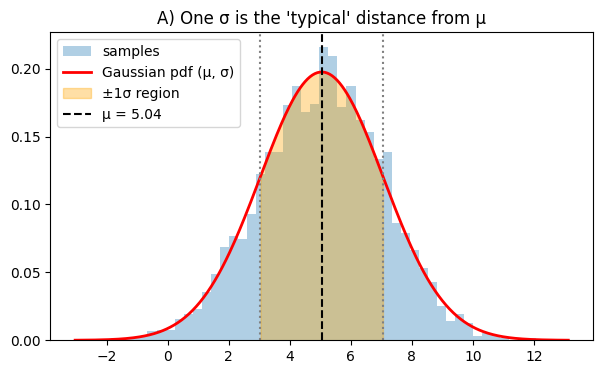

In [57]:
# ---------- Figure (A): Histogram + true pdf with ±1σ shading ----------
xs = np.linspace((mean-4*sd).item(), (mean+4*sd).item(), 400)
pdf = (1/(sd.item()*math.sqrt(2*math.pi))) * np.exp(-(xs-mean.item())**2 / (2*sd.item()**2))

fig, ax = plt.subplots(1,1, figsize=(7,4))
ax.hist(x.numpy(), bins=50, density=True, alpha=0.35, label="samples")
ax.plot(xs, pdf, 'r-', lw=2, label="Gaussian pdf (μ, σ)")

# Shade μ±σ
lo, hi = (mean-sd).item(), (mean+sd).item()
mask = (xs >= lo) & (xs <= hi)
ax.fill_between(xs[mask], 0, pdf[mask], color='orange', alpha=0.35, label="±1σ region")

ax.axvline(mean.item(), color='k', ls='--', lw=1.5, label=f"μ = {mean.item():.2f}")
ax.axvline(lo, color='gray', ls=':')
ax.axvline(hi, color='gray', ls=':')
ax.set_title("A) One σ is the 'typical' distance from μ")
ax.legend(loc="upper left")
plt.show()


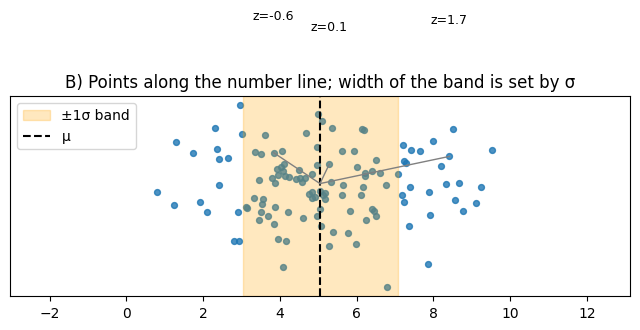

In [58]:
# ---------- Figure (B): 1D dot-strip with ±σ band and a few z-scores ----------
# Pick 120 random points and jitter vertically for visibility
idx = torch.randperm(n)[:120]
pts = x[idx].numpy()
y = np.zeros_like(pts) + 0.0 + 0.02*np.random.randn(len(pts))  # tiny vertical jitter

fig, ax = plt.subplots(1,1, figsize=(8,2.6))
ax.scatter(pts, y, s=18, alpha=0.8)
ax.axvspan((mean-sd).item(), (mean+sd).item(), color='orange', alpha=0.25, label="±1σ band")
ax.axvline(mean.item(), color='k', ls='--', lw=1.5, label="μ")

# Annotate a couple of example points
pick = np.random.choice(len(pts), size=3, replace=False)
for i in pick:
    z = (pts[i] - mean.item()) / sd.item()
    ax.plot([pts[i], mean.item()], [y[i], 0], color='gray', lw=1)
    ax.text(pts[i], y[i]+0.08, f"z={z:.1f}", ha='center', fontsize=9)

ax.set_yticks([])
ax.set_xlim(mean.item()-4*sd.item(), mean.item()+4*sd.item())
ax.set_title("B) Points along the number line; width of the band is set by σ")
ax.legend(loc="upper left")
plt.show()


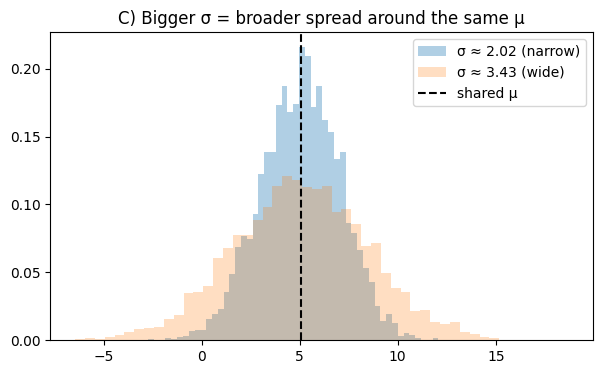

In [59]:
# ---------- Figure (C): Same mean, different σ (narrow vs wide) ----------
fig, ax = plt.subplots(1,1, figsize=(7,4))
ax.hist(x.numpy(), bins=50, density=True, alpha=0.35, label=f"σ ≈ {sd.item():.2f} (narrow)")
ax.hist(x_wide.numpy(), bins=50, density=True, alpha=0.25, label=f"σ ≈ {sd_w.item():.2f} (wide)")
ax.axvline(mean.item(), color='k', ls='--', lw=1.5, label="shared μ")
ax.set_title("C) Bigger σ = broader spread around the same μ")
ax.legend()
plt.show()


# Benchmarks 

```python
import timeit

# Accessing element in a list vs tuple
print(timeit.timeit("x[0]", setup="x=[1,2,3,4,5]", number=10_000_000))
print(timeit.timeit("x[0]", setup="x=(1,2,3,4,5)", number=10_000_000))

import sys
print(sys.getsizeof([1,2,3]))  # e.g. 80 bytes
print(sys.getsizeof((1,2,3)))  # e.g. 64 bytes
```

# [cool site with Convolution Visualizer](https://ezyang.github.io/convolution-visualizer/index.html)